# Yelp Classification

## Problem Statement 
- in this project , natural language processing (NLP) strategiers will be used to analyze yelp reviews data 
- number of 'stars' indicate the business rating given by a customer .ranging from 1 to 5 
- 'Cool','Useful' and 'funny ' indicate the number of cool votes given by other yelp users 

### import libaries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


### import dataset

In [2]:
yelp_df = pd.read_csv('yelp.csv')

In [3]:
yelp_df.head(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [4]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
print(yelp_df['text'][0])



My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [11]:
print(yelp_df['text'][1])

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

In [12]:
print(yelp_df['text'][9998])


My nephew just moved to Scottsdale recently so me and a bunch of friends brought him here to show him a local bar that he and the girlfriend could come shoot pool, watch football, play volleyball etc...well....we weren't there 5minutes and 2 kids were running around the pool tables, messing up our games and screaming. I couldn't believe the staff was allowing this to happen. They were hitting the pool sticks on everything and crying when their mom attempted (in vain) to quiet them. You'd think the mom would leave at this point with her  kids....um...no....the staff did seem annoyed as well but said nothing. Then....it happened...she said " you guys better behave or mommy will be fired"!! Holy shit....she works there!! Even worse! Shame on that owner for allowing this to happen. And that employee needs to recognize this...YOU WORK AT A BAR.....not a daycare....A BAR!!!


In [13]:
print(yelp_df['text'][9999])


4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and Spinatos is at the top of my pizza fix list.. the semi sweet sauce is addictive, great service, fresh ingredients, The Spicy Italian is my favorite... The chocolate chips cookies are laced with mind altering drugs, that make your body parts"romantic" when you think of their cookies.. BTW 5:30pm, on a Tuesday, when we left, a 30 minute wait.. Its on the List..


### Visualize dataset

In [14]:
yelp_df['length'] = yelp_df['text'].apply(len)

In [15]:
yelp_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


<Axes: ylabel='Frequency'>

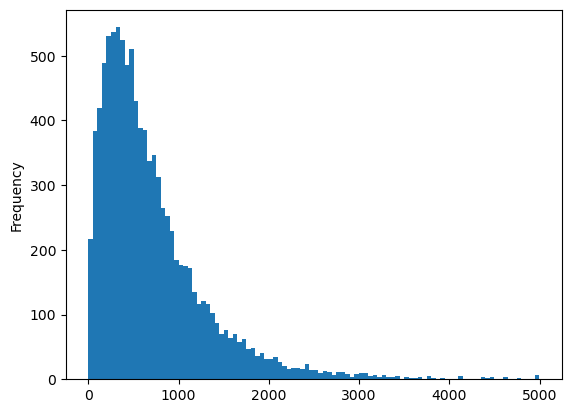

In [16]:
yelp_df['length'].plot(bins =100, kind='hist')

In [17]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [ ]:
## max text review
yelp_df[yelp_df['length']== 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [22]:
## min text review 
yelp_df[yelp_df['length']==1]['text'].iloc[0]

'X'

In [23]:
## mean text review 
yelp_df[yelp_df['length']==711]['text'].iloc[0]

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

In [25]:
## review conut 
yelp_df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<Axes: xlabel='count', ylabel='stars'>

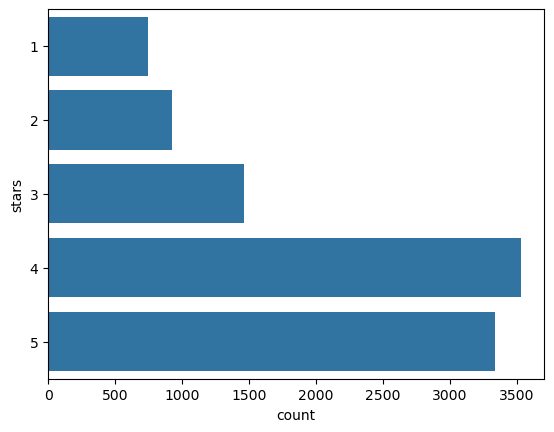

In [26]:
sns.countplot(y='stars',data=yelp_df)

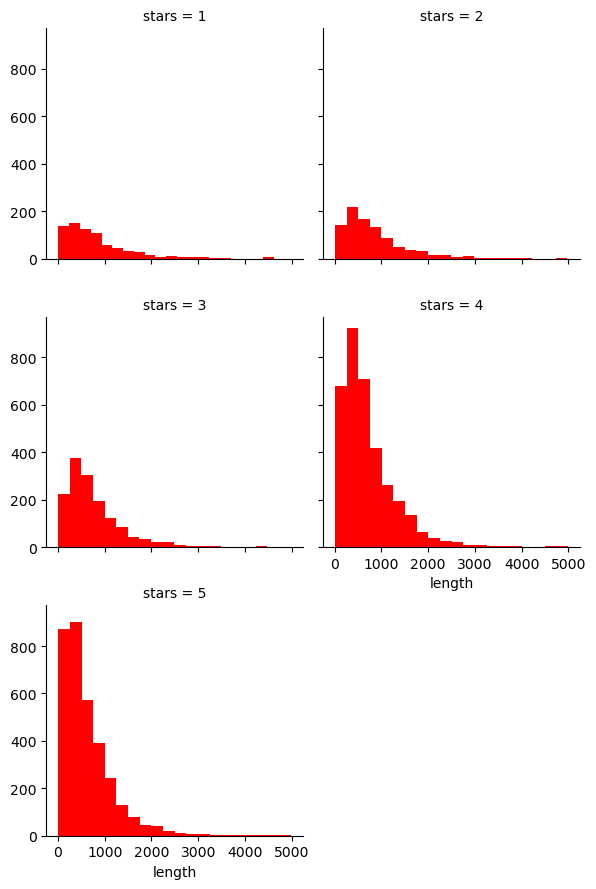

In [29]:
g = sns.FacetGrid(data = yelp_df ,col ='stars',col_wrap=2)
g.map(plt.hist,'length',bins=20,color='red')

In [31]:
yelp_df_1 = yelp_df[yelp_df['stars']==1]
yelp_df_2 = yelp_df[yelp_df['stars']==2]
yelp_df_3 = yelp_df[yelp_df['stars']==3]
yelp_df_4 = yelp_df[yelp_df['stars']==4]
yelp_df_5 = yelp_df[yelp_df['stars']==5]


In [32]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [33]:
yelp_df_2

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
15,Vb9FPCEL6Ly24PNxLBaAFw,2011-03-20,HvqmdqWcerVWO3Gs6zbrOw,2,Was it worth the 21$ for a salad and small piz...,review,ylWOj2y7TV2e3yYeWhu2QA,0,2,0,705
56,tA2DT7CGQPzgA6tTcTkXDw,2009-09-02,VyX6x7wnThr9g9Z6VBDIgA,2,I have to add to Andrew's review.....\n\nI jus...,review,UL9chyH0a4Pj8J_9M6WSpA,1,2,2,2027
110,0RqNRc6RiILzZxK9J8Kqug,2012-03-03,2dEtB3h8yZEONOmUJIUPZQ,2,This is my first time back in years. It will b...,review,uQYOGKahTkpR9wEVjaAOCw,0,2,2,261
129,c0iszTWZwYtO3TgBx0Z0fQ,2008-04-23,7Xmf43U-uyrL6FFtq6OSBA,2,I feel the Days Inn Tempe is best described as...,review,rVlgz-MGYRPa8UzTYO0RGQ,1,3,1,982
137,87EXGxQk0nrM41NCfB1HTQ,2011-06-19,XGZzqC_pPOwqO5QZhHdBNw,2,"I'd love to give these guys a better review, b...",review,XYVfcuxJ4x805zIWvJ17MA,0,1,0,1486
...,...,...,...,...,...,...,...,...,...,...,...
9936,_cG0BFYyHXcwheKXR5RRBA,2009-09-22,mY9xE7iJ1wnnZEH7FgqGIw,2,What can I say... I am a bargain shopper! I'm ...,review,iBO2m9xXivsIbvFnZHsNvg,2,2,1,457
9952,Zh_y9AmSfWZpR2JB9wye-A,2012-05-19,MCHvLpzHO6ByEcZ74lCVBg,2,Are there food that is NOT-true ?\nOK... I got...,review,sUTQfzzxxc2c3g6cFH19pQ,0,1,0,449
9954,24V8QQWO6VaVggHdxjQQ_A,2012-10-18,q4qgrm3h6JHh27MrIKPjWQ,2,Stopped here for lunch with my BFF today.\n\nN...,review,Sr-wB9G8KflQjbAS8Q3HQg,0,0,0,1950
9974,cdacUBBL2tDbDnB1EfhpQw,2009-12-16,bVU-_x9ijxjEImNluy84OA,2,If Cowboy Ciao is the best restaurant in Scott...,review,V9Uqt00HXwXT6mzsVCjMAw,0,0,0,473


In [34]:
yelp_df_3

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
16,supigcPNO9IKo6olaTNV-g,2008-10-12,HXP_0Ul-FCmA4f-k9CqvaQ,3,We went here on a Saturday afternoon and this ...,review,SBbftLzfYYKItOMFwOTIJg,3,4,2,1469
18,b5cEoKR8iQliq-yT2_O0LQ,2009-03-06,v0cTd3PNpYCkTyGKSpOfGA,3,I met a friend for lunch yesterday. \n\nLoved ...,review,UsULgP4bKA8RMzs8dQzcsA,5,6,4,1161
20,8FNO4D3eozpIjj0k3q5Zbg,2008-10-08,MuqugTuR5DdIPcZ2IVP3aQ,3,DVAP....\n\nYou have to go at least once in yo...,review,C6IOtaaYdLIT5fWd7ZYIuA,2,4,1,565
34,3oLy0rlzRI_xiqfQHqC4_g,2011-03-27,Bk7F8IyBuOHVp6w3BAKVow,3,There's two ways to look at this place. One is...,review,1guJDgUfTiDdbgKqBhsZFQ,1,3,1,610
45,qB-qsaSnhbHCt18_AN4Quw,2011-12-21,1FvrC35rTJ6BWFvRog7tuA,3,Everything was nice. The ice cream was delicio...,review,66PQJEHC0tCWGMI4V9KT-Q,0,0,0,243
...,...,...,...,...,...,...,...,...,...,...,...
9967,qNqvJIH4_KENAajUfRZKoA,2012-10-29,UoxTfwbLylXWpwrn8tYEeQ,3,I thought I had reviewed this location already...,review,VPXgY9lGJF3XC4ZpusxNuA,1,1,1,392
9968,HIiVx2mseVWKtx8TKfWC_A,2010-06-07,TrFMPwWeaCWu8yDVWVkYwA,3,I have never been here before so I didn't know...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,2,1,1799
9976,iDYzGVIF1TDWdjHNgNjCVw,2009-09-11,bKjMcpNj0xSu2UI2EFQn1g,3,I was looking for chile rellenos and this plac...,review,2tUCLMHQKz4kA1VlRB_w0Q,0,0,0,465
9983,24V8QQWO6VaVggHdxjQQ_A,2010-06-06,PqiIeFOiVr-tj_FtHGAH2g,3,3.5 stars. \n\nWe decided to check this place ...,review,LaEj3VpQh7bgpAZLzSRRrw,1,4,1,861


In [35]:
yelp_df_4

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
13,WGNIYMeXPyoWav1APUq7jA,2011-12-23,FvEEw1_OsrYdvwLV5Hrliw,4,"Good tattoo shop. Clean space, multiple artist...",review,Xm8HXE1JHqscXe5BKf0GFQ,1,2,0,593
...,...,...,...,...,...,...,...,...,...,...,...
9986,oCA2OZcd_Jo_ggVmUx3WVw,2012-03-31,ijPZPKKWDqdWOIqYkUsJJw,4,I came here in December and look forward to my...,review,yzwPJdn6yd2ccZqfy4LhUA,0,0,0,647
9988,xY1sPHTA2RGVFlh5tZhs9g,2012-06-02,TM8hdYqs5Zi1jO5Yrq6E0g,4,For our first time we had a great time! Our se...,review,GvaNZY4poCcd3H4WxHjrLQ,0,2,0,496
9993,maB4VHseFUY2TmPtAQnB9Q,2011-06-27,SNnyYHI9rw9TTltVX3TF-A,4,"Judging by some of the reviews, maybe I went o...",review,T46gxPbJMWmlLyr7GxQLyQ,1,1,0,426
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881


In [36]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [39]:
yelp_df_1_5 = pd.concat([yelp_df_1,yelp_df_5])
yelp_df_1_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498


In [40]:
yelp_df_1_5.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0,461


In [41]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [44]:
print('1-stars review percentage ',(len(yelp_df_1)/len(yelp_df_1_5))*100,'%')

1-stars review percentage  18.330885952031327 %


In [45]:
print('5-stars review percentage ',(len(yelp_df_5)/len(yelp_df_1_5))*100,'%')

5-stars review percentage  81.66911404796868 %


<Axes: xlabel='stars', ylabel='count'>

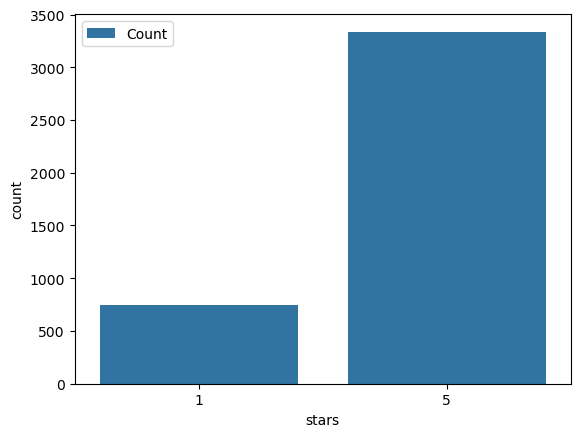

In [48]:
sns.countplot(x=yelp_df_1_5['stars'],label='Count')

##  remove punctuation ,count vectorizer  and stopwords 

In [ ]:
## remove punctuation 
import string 
from nltk.corpus import stopwords

def message_cleaning(message):
    Test_punc_removed =[char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean =[ word for word in Test_punc_removed_join.split() if word.lower()  not in stopwords.words('english')]
    return Test_punc_removed_join_clean


In [53]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [54]:
print(yelp_df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [55]:
print(yelp_df_1_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [57]:
yelp_df_1_5['length'].describe()

count    4086.000000
mean      661.938815
std       601.621371
min         6.000000
25%       256.000000
50%       489.500000
75%       878.000000
max      4986.000000
Name: length, dtype: float64

In [60]:
yelp_df_clean.apply(len).describe()

count    4086.000000
mean       62.879344
std        56.254239
min         1.000000
25%        25.000000
50%        47.000000
75%        83.000000
max       478.000000
Name: text, dtype: float64

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer=message_cleaning)
yelp_countvectorizer = vec.fit_transform(yelp_df_1_5['text'])

In [63]:
print(vec.get_feature_names_out())

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [64]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
yelp_countvectorizer.shape

(4086, 26435)

## model tranning 

In [67]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [68]:
NB_classifier.fit(yelp_countvectorizer,label)

MultinomialNB()

In [69]:
testing_sample=['amazing food! highly recommended']
testing_sample_countvecotorizer = vec.transform(testing_sample)
test_predict =NB_classifier.predict(testing_sample_countvecotorizer)
test_predict

array([5])

In [70]:
X =yelp_countvectorizer
y =label

In [71]:
X.shape,y.shape

((4086, 26435), (4086,))

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.2,random_state=0)

In [73]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()